<a href="https://colab.research.google.com/github/82938287/.github/blob/main/mlp_mnist_test(%ED%95%99%EC%83%9D%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[해보기-①] MNIST 데이터 준비**

In [ ]:
from sklearn.datasets import fetch_openml # scikit-learn모듈에서 ML용 학습데이타, MNIST를 읽기 위한 함수 import

mnist= fetch_openml('mnist_784', as_frame=False) # mnist데이타 읽어들여 mnist변수에 배정, numpy type으로 읽기
print(mnist.data.shape, mnist.target.shape)


# **[해보기-②③] MNIST 데이터 세트 속성과 속성 레이블 확인**

In [ ]:
import numpy as np
print(mnist.feature_names)     # MNIST 속성 이름 출력
print(np.unique(mnist.target)) # MNIST 레이블의 클래스(레이블) 출력
print(type(mnist.data))        # MNIST 데이터의 타입
print(mnist.data[150])   # 151번째 MNIST 데이터값
print(mnist.target[150]) # 151번째 MNIST 데이터의 레이블값
print(type(mnist.target))      # MNIST 데이터의 레이블의 타입

# **[해보기-④⑤⑥] pyplot을 이용하여 201번째 MNIST 데이터 이미지로 읽기 및 레이블 값 보기**

In [ ]:
import matplotlib.pyplot as plt
n = 150                            # 데이터 세트 중 201번째 데이터
image = mnist.data[n].reshape(28, 28)           # 28행, 28열로 형태 변경
plt.subplot(1,2,1)                                  # 1행 2열의 첫 번째 그림으로
plt.imshow(image, cmap='gray')                                 # 흑백 그림으로 표현
plt.subplot(1,2,2)                    # 1행 2열의 두 번째 그림으로
plt.imshow(image, cmap='gray_r')      # 흑백 그림으로 표현 (reverse)
plt.title(mnist.target[n])            # 10번째 데이터의 레이블 출력
plt.show()                            # 그림 표시

# **[해보기] MNIST 데이터 여러개(11부터 9개)를 이미지로 보기**

In [ ]:
import matplotlib.pyplot as plt

n=10                         # 데이터 세트에서 시작 위치
plt.figure(figsize=(5,5))    # 그림 크기 설정

for i in range(9):           # 9번 반복 (0에서 8까지)
    plt.subplot(3,3,i+1)     # 3x3 그림 중 i+1번째 하위 그림 지정
    plt.imshow(mnist.data[n+i].reshape(28,28),'gray')    # n+i번째 데이터 28x28 형태로 수정 후 보이기
    plt.title(mnist.target[n+i])  # n+i번째 데이터 레이블을 제목으로 설정
    plt.axis('off')               # 축값 표기는 off로
plt.show()                        # 그림 표시

# **[해보기-⑦] MNIST데이터(7만개)를 훈련 데이터(70%)와 테스트 데이터(30%) 나누기**

In [ ]:
from sklearn.model_selection import train_test_split        # train_test_split 불러오기
X_train, X_test, y_train, y_test = train_test_split(mnist.data,            # train_test_split 실행, data, target
                                     mnist.target,
                                     test_size=0.3,           # 비율: 0.3
                                     stratify=mnist.target)   # 레이블별 비율 맞춤

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #각 형태 출력

# **[해보기-⑧] MLP(multilayer perceptron)의 구조만들기, 입력층, 은닉층, 출력층 구성하기**

In [ ]:
from sklearn.neural_network import MLPClassifier  # MLPClassifier 가져오기
model = MLPClassifier(hidden_layer_sizes=(50),             # 은닉 층 50 노드
             activation='relu',              # 활성화 함수 'relu'
             solver='adam',              # 최적화 함수 ‘adam'
             max_iter=20,              # 반복 학습 20 회
             verbose=1)     # 학습 과정이 보이도록 설정

# **[해보기] 위에서 구성한 모델을 이용하여 MNIST 데이터를 학습**

In [ ]:
model.fit(X_train, y_train)   # 손실률은 학습할 때마다 달라질 수 있음.

# **epoch당 손실률(오차,Loss)의 변화 시각화**

In [ ]:
import matplotlib.pyplot as plt

loss_values = model.loss_curve_              # 모델의 손실률 저장
line_x = np.arange(1, len(loss_values)+1)    # 저장된 손실률 개수만큼 x축 생성
plt.plot(line_x, loss_values, 'r')           # 반복 학습 별 손실률 그리기
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# **[해보기-⑩] 학습한 모델의 MNIST 분류 성능 평가**

In [ ]:
print("Train set score: ", model.score(X_train, y_train))                              # 훈련용 데이터 정확도 평가
print("Test set score: ", model.score(X_test, y_test))     # 검증용 데이터 정확도 평가

## **MNIST 분류 모델의 학습 곡선 (SKIP)**

Iteration 1, loss = 13.89916867
Iteration 2, loss = 4.11999175
Iteration 3, loss = 2.48066654
Iteration 4, loss = 1.66505075
Iteration 5, loss = 1.21023287
Iteration 6, loss = 0.89751564
Iteration 7, loss = 0.52839849
Iteration 8, loss = 0.35329624
Iteration 9, loss = 0.34752791
Iteration 10, loss = 0.23708002
Iteration 11, loss = 0.11748247
Iteration 12, loss = 0.06825941
Iteration 13, loss = 0.04610613
Iteration 14, loss = 0.02230399
Iteration 15, loss = 0.02863593
Iteration 16, loss = 0.01720981
Iteration 17, loss = 0.00933563
Iteration 18, loss = 0.00488414
Iteration 19, loss = 0.01184569
Iteration 20, loss = 0.00650364
Iteration 21, loss = 0.00641240
Iteration 22, loss = 0.00738719
Iteration 23, loss = 0.00354263
Iteration 24, loss = 0.00298775
Iteration 25, loss = 0.00506378
Iteration 26, loss = 0.00094862
Iteration 27, loss = 0.00133621
Iteration 28, loss = 0.00077892
Iteration 29, loss = 0.00096912
Iteration 30, loss = 0.00614155
Iteration 31, loss = 0.01505881
Iteration 32, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 3.60724916
Iteration 2, loss = 1.21126223
Iteration 3, loss = 0.67578392
Iteration 4, loss = 0.44588951
Iteration 5, loss = 0.32835048
Iteration 6, loss = 0.24930089
Iteration 7, loss = 0.19314316


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


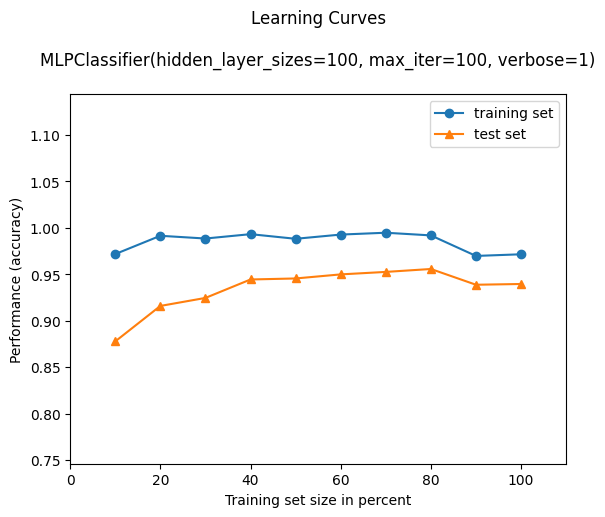

In [11]:
from mlxtend.plotting import plot_learning_curves    # plot_learning_curves 불러오기

plot_learning_curves(X_train, y_train, X_test, y_test, # plot_learning_curves 실행, 모델의 정확도 평가
                     model, scoring='accuracy')
plt.show()

# **[해보기-⑪⑫⑬] 학습한 모델을 가지고 데이터를 입력하고 결과값(레이블, 카테고리)을 예측**

In [12]:
print(y_train[200])             # 학습데이터 201번째의 실제 정답 레이블
y_predict=model.predict(X_train[200].reshape(1, -1))             # 학습한 모델을 이용한 201번째 데이터의 레이블 예측
print(y_predict)             # 예측한 레이블 출력

print(y_train[300])
y_predict = model.predict(X_train[300].reshape(1,-1))
print(y_predict)

print(X_train[300].shape,(X_train[300].reshape(1,-1)).shape) # shape출력

0
['0']
5
['5']
(784,) (1, 784)


# **구글 드라이브 연동**

In [14]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

MessageError: Error: credential propagation was unsuccessful

# **구글드라이브 내디렉토리 밑에 mlp디렉토리를 만들고 그 디렉토리에 학습시킨 모델을 mlp_model.pkl로 저장**

In [33]:
import joblib
joblib.dump(model, '/5.jpeg')

['/5.jpeg']

# **[해보기-⑭] 저장된 모델 불러오기**

In [34]:
model1=joblib.load('/5.jpeg') #mlp디렉토리에 저장된 모델을 불러와서 model로 지정

# **불러온 모델의 성능 평가**

In [35]:
model.score(X_test, y_test) #테스트 데이터와 테스트 데이터 정답을 이용

0.9394285714285714

# **폰으로 숫자를 만들어 이미지로 저장하고 불러오기 위한 이미지 처리를 위한 opencv설치**

In [36]:
!pip install opencv-python

# **[해보기-⑮]테스트해 볼 숫자 이미지를 mlp디렉토리에 upload후 MNIST데이타에서 학습시킨 조건에 맞게 변화시킴 (27x27)사이즈로 resize한 후 1차원 벡터로**

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
img1 = cv2.imread('/1.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/2.jpeg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('/3.jpeg', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('/4.jpeg', cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread('/5.jpeg', cv2.IMREAD_GRAYSCALE)
img8 = cv2.imread('/8.jpeg', cv2.IMREAD_GRAYSCALE)

# 이진화 처리 (임계값을 130으로 설정)
ret, binary1 = cv2.threshold(img1, 130, 255, cv2.THRESH_BINARY_INV)
ret, binary2 = cv2.threshold(img2, 130, 255, cv2.THRESH_BINARY_INV)
ret, binary3 = cv2.threshold(img3, 130, 255, cv2.THRESH_BINARY_INV)
ret, binary4 = cv2.threshold(img4, 130, 255, cv2.THRESH_BINARY_INV)
ret, binary5 = cv2.threshold(img5, 130, 255, cv2.THRESH_BINARY_INV)
ret, binary8 = cv2.threshold(img8, 130, 255, cv2.THRESH_BINARY_INV)

# 크기 조정 및 정규화
img1_r = cv2.resize(binary1, (28, 28), interpolation=cv2.INTER_AREA)
img2_r = cv2.resize(binary2, (28, 28), interpolation=cv2.INTER_AREA)
img3_r = cv2.resize(binary3, (28, 28), interpolation=cv2.INTER_AREA)
img4_r = cv2.resize(binary4, (28, 28), interpolation=cv2.INTER_AREA)
img5_r = cv2.resize(binary5, (28, 28), interpolation=cv2.INTER_AREA)
img8_r = cv2.resize(binary8, (28, 28), interpolation=cv2.INTER_AREA)



##**resize한 숫자 이미지를 pyplot을 이용해서 화면에 출력**

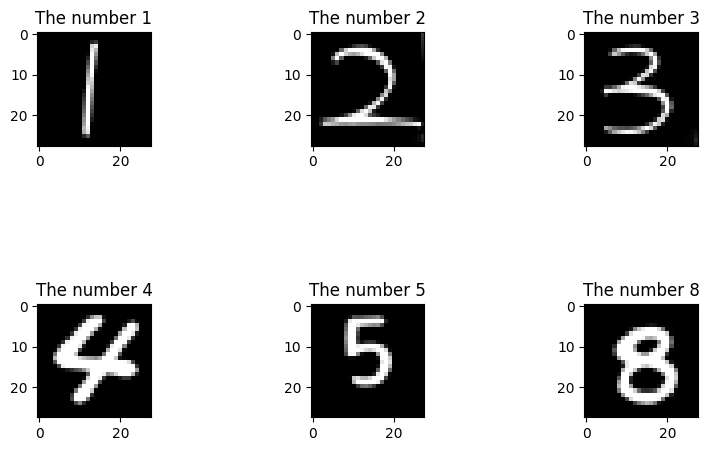

In [42]:

# 시각화
plt.figure(figsize=(10, 5))

plt.subplot(3, 3, 1)
plt.title('The number 1')
plt.imshow(img1_r, cmap='gray')

plt.subplot(3, 3, 2)
plt.title('The number 2')
plt.imshow(img2_r, cmap='gray')

plt.subplot(3, 3, 3)
plt.title('The number 3')
plt.imshow(img3_r, cmap='gray')

plt.subplot(3, 3, 7)
plt.title('The number 4')
plt.imshow(img4_r, cmap='gray')

plt.subplot(3, 3, 8)
plt.title('The number 5')
plt.imshow(img5_r, cmap='gray')

plt.subplot(3, 3, 9)
plt.title('The number 8')
plt.imshow(img8_r, cmap='gray')

plt.show()

# **[해보기-⑯] 불러온 학습된 모델을 이용해 업로드한 숫자 이미지를 분류**

In [43]:
# 예측 실행
y1_predict = model.predict(img1_r.reshape(1,-1))
y2_predict = model.predict(img2_r.reshape(1,-1))
y3_predict = model.predict(img3_r.reshape(1,-1))
y4_predict = model.predict(img4_r.reshape(1,-1))
y5_predict = model.predict(img5_r.reshape(1,-1))
y8_predict = model.predict(img8_r.reshape(1,-1))

# **[해보기-⑰] 예측된 카테고리(레이블)을 출력**

In [45]:
# 예측 결과 출력
print("Predicted class for img1:", y1_predict)
print("Predicted class for img2:", y2_predict)
print("Predicted class for img3:", y3_predict)
print("Predicted class for img4:", y4_predict)
print("Predicted class for img5:", y5_predict)
print("Predicted class for img8:", y8_predict)

Predicted class for img1: ['6']
Predicted class for img2: ['2']
Predicted class for img3: ['3']
Predicted class for img4: ['4']
Predicted class for img5: ['5']
Predicted class for img8: ['8']
